# <center>Estimation of Fallowed Land with Classification and Regression Trees via Google Earth Engine</center>

###### In the future I will be adding links to different scripts in GEE to show how the map reacts to the code since it is not possible to do so inside the Jupyter Notebook environment.

## Imports:

#### There are a couple different ways you can import in Google Earth Engine. For our project we will be using the table format for Kern County data and a FeatureCollection for our geometry points. 

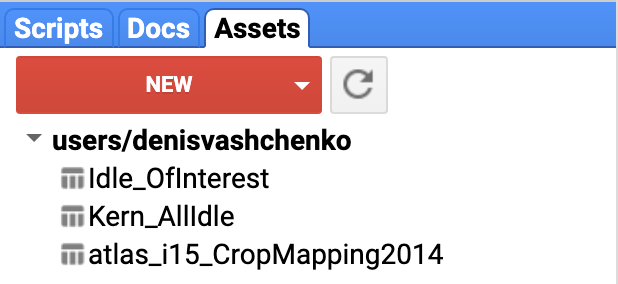

#### All imports can be handled through the assets tab where you can upload shape files for table data. 

## Landsat Layer:

In [ ]:
Map.setCenter(-119.44,35.65);

//Filter
var image = ee.Image(ee.ImageCollection('LANDSAT/LC08/C01/T1_RT')
  .filterBounds(roi)
  .filterDate('2014-5-01', '2014-5-10')
  .sort('CLOUD_COVER')
  .first());
  
Map.addLayer(all_fallow);
Map.addLayer(image, {bands: ['B5', 'B4', 'B3']}, 'Landsat');

#### We will be using LANDSAT8 in order to pick geometry points for classification of fallow and not_fallow land. GEE provides these imports and they can be referenced as an image collection as shown above. 

#### Lines 5-8 are stating that we want to focus on our region of interest, specific time, and retrieve the least cloudy image.

#### We can then go ahead and add the layer to the map in order to visualize our script. (will provide GEE link to see this step) 

## Data Collection

#### Geometry points for classes of Fallow and Not_Fallow are collected by hand by using the tool below. 

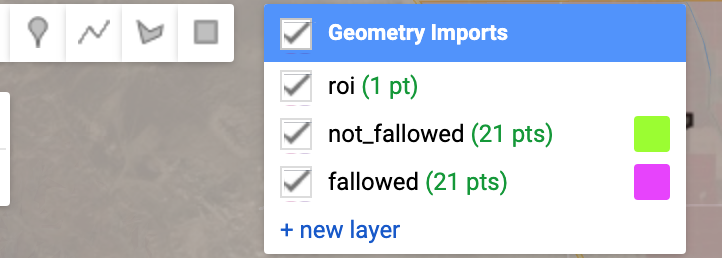

#### Simply hover over the Geometry Imports box and click "+ new layer". Each layer will be a new class for our training data. In our case this is fallowed and not_fallowed. 

In [ ]:
//Merging imports of sample regions into one feature collection 
var trainingFC = fallowed.merge(not_fallowed);

//Training data
var bands = ['B5','B4','B3'];
var training = image.select(bands).sampleRegions({
  collection: trainingFC,
  properties: ['landcover'],
  scale: 30
});

#### Here we are going to merge our geometry points into one training FeatureCollection in order to pass to our model. 

## Model Training

In [ ]:
//Classifier Training
var classifier = ee.Classifier.cart().train({
  features: training,
  classProperty: 'landcover', 
  inputProperties: bands
  
});

//Run classification 
var classified = image.select(bands).classify(classifier);